## 1. 対象者のデータセット確立

In [1]:
%matplotlib inline

import datetime as datetime
from collections import Counter as ct
import codecs
from enum import IntEnum
import warnings

import numpy as np
import pandas as pd
import openpyxl as px

import matplotlib
import matplotlib.pyplot as plt

csv_path = '../data/'
baseline = pd.read_csv(csv_path+'baseline.csv')

e = baseline['ExclusionFlag']

print (
    "Of " + str(e.count()) + "　patients transferred by ambulance to our center during the study period, we excluded "  \
    + str((e==1).sum()) + " patients of 6 years of age or younger, "  \
    + str((e==2).sum()) + " and patients with missing or invalid information on variables. " \
    + "A total of " + str((e==0).sum()) + " patients were included in the analysis."
)

encounter_list = baseline.drop(list(baseline.loc[baseline['ExclusionFlag'] != 0].index))

Of 5904　patients transferred by ambulance to our center during the study period, we excluded 388 patients of 6 years of age or younger, 3050 and patients with missing or invalid information on variables. A total of 2466 patients were included in the analysis.


## Vitalデータの分布図一覧

(array([  4.,   5.,   5.,   3.,   6.,  19.,  12.,  31.,  66.,  77., 143.,
        216., 306., 178., 358., 259., 172., 128.,  98.,  32.,  56.,  39.,
         37.,  29.,  33.,  25.,  13.,  23.,  16.,  16.,  16.,  12.,  13.,
          6.,   1.,   4.,   3.,   3.,   1.,   2.]),
 array([34.   , 34.185, 34.37 , 34.555, 34.74 , 34.925, 35.11 , 35.295,
        35.48 , 35.665, 35.85 , 36.035, 36.22 , 36.405, 36.59 , 36.775,
        36.96 , 37.145, 37.33 , 37.515, 37.7  , 37.885, 38.07 , 38.255,
        38.44 , 38.625, 38.81 , 38.995, 39.18 , 39.365, 39.55 , 39.735,
        39.92 , 40.105, 40.29 , 40.475, 40.66 , 40.845, 41.03 , 41.215,
        41.4  ]),
 <a list of 40 Patch objects>)

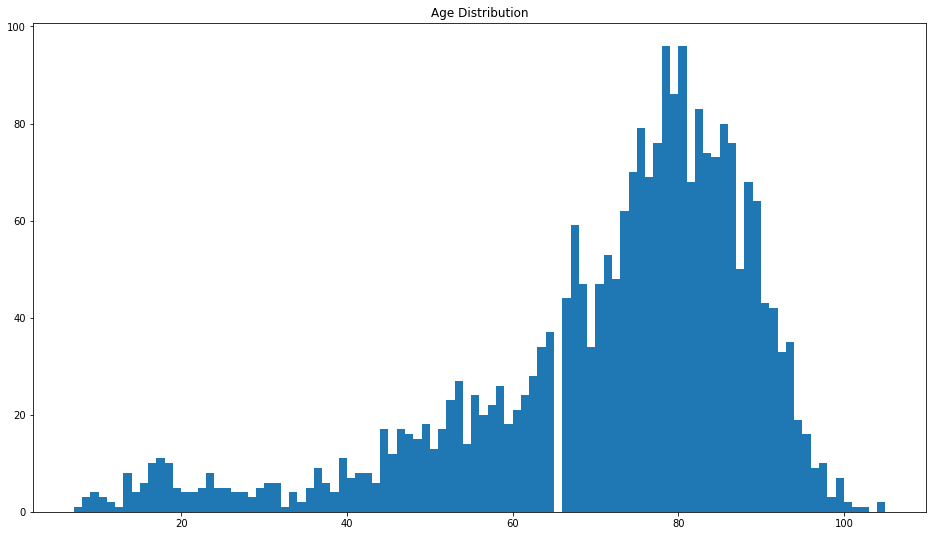

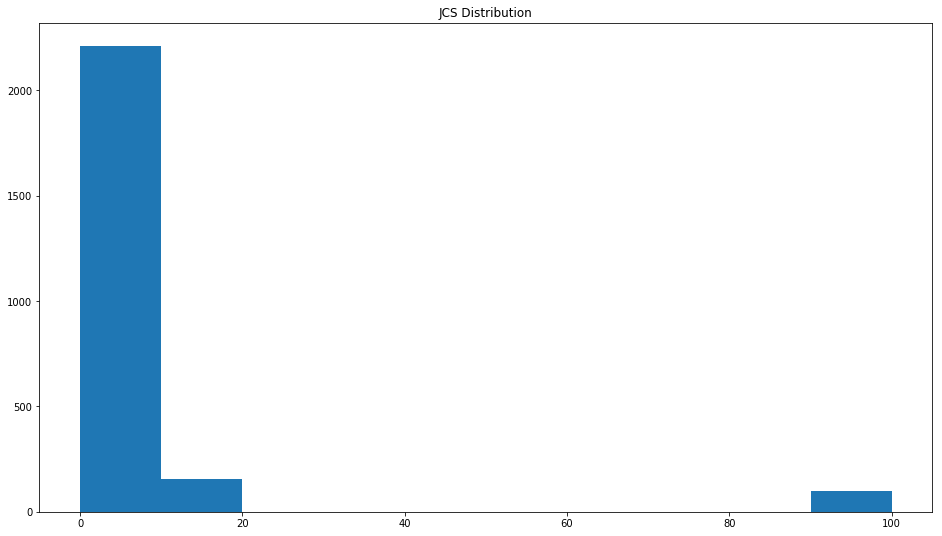

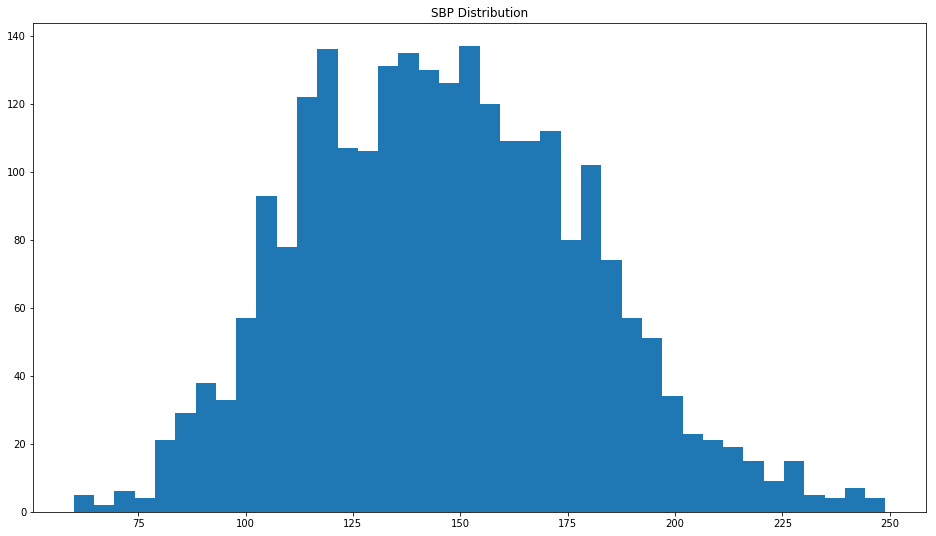

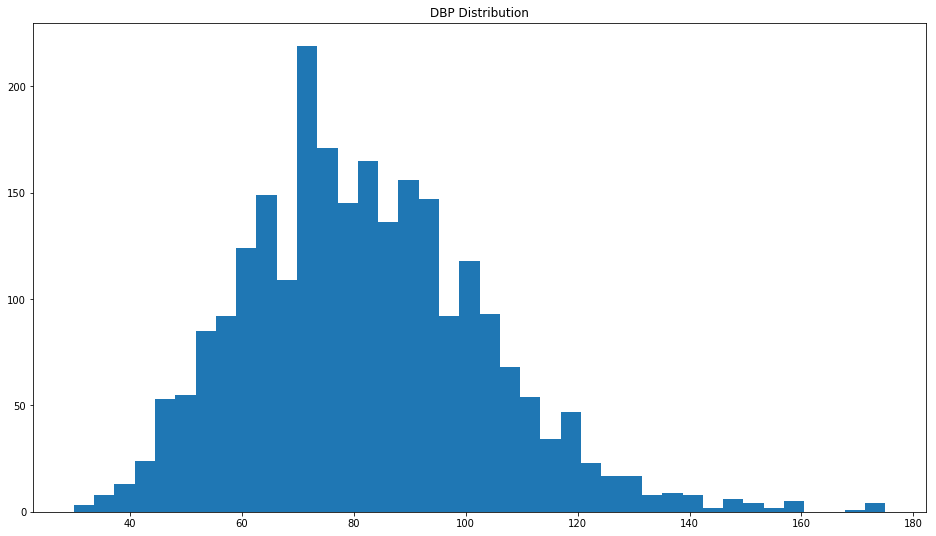

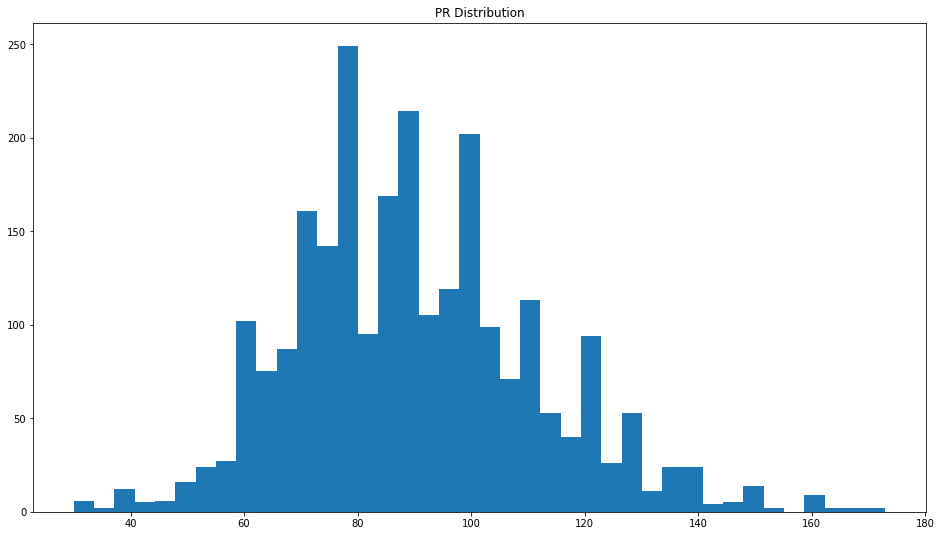

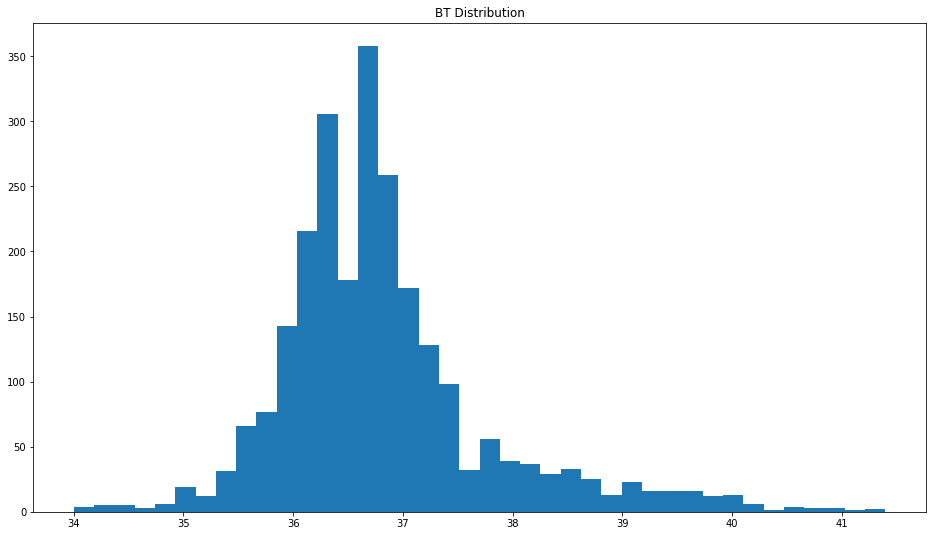

In [2]:
# ----------------------------------------------------------- #
# Vi
# ----------------------------------------------------------- #

x = encounter_list['Age'].values
bins = int(max(x) - min(x))
plt.figure(figsize=(16, 9))
plt.title('Age Distribution')
plt.hist(x, bins=bins)


x = encounter_list['JCS'].values
bins = 10
plt.figure(figsize=(16, 9))
plt.title('JCS Distribution')
plt.hist(x, bins=bins)


x = encounter_list['SBP'].values
bins = 40
plt.figure(figsize=(16, 9))
plt.title('SBP Distribution')
plt.hist(x, bins=bins)


x = encounter_list['DBP'].values
bins = 40
plt.figure(figsize=(16, 9))
plt.title('DBP Distribution')
plt.hist(x, bins=bins)


x = encounter_list['PR'].values
bins = 40
plt.figure(figsize=(16, 9))
plt.title('PR Distribution')
plt.hist(x, bins=bins)


x = encounter_list['BT'].values
bins = 40
plt.figure(figsize=(16, 9))
plt.title('BT Distribution')
plt.hist(x, bins=bins)

## 2. 既往歴の度数表

In [3]:
icd_columns = [
    'I10', 'E11', 'E14', 'I51', 'E78', 'I63', 'J45','I20', 'I48', 'F29', 'G30', 'K35', 'I50', 'I21', 'M48', 'K37', 'F03','K25', 'G40',
    'C18', 'N18', 'H26', 'N19', 'F32', 'N40', 'K80', 'I49','E79', 'C16', 'R56'
]

freq_table_list = []
for icd_code in icd_columns:
    counter_dict = dict(ct(list(encounter_list[icd_code].values)))
    true_freq = counter_dict[1]
    false_freq = counter_dict[0]
    true_prop = str(round(true_freq / (true_freq + false_freq)* 100, 2)) + '%'
    false_prop = str(round(false_freq / (true_freq + false_freq) * 100, 2)) + '%'
    elem_list = [icd_code, true_freq, false_freq, true_prop, false_prop]
    freq_table_list.append(elem_list)
    
freq_table = pd.DataFrame(
    np.array(freq_table_list), columns=['ICD_Code', 'True_freq', 'False_freq', 'True_prop', 'False_prop']
)

freq_table

,ICD_Code,True_freq,False_freq,True_prop,False_prop
0,I10,1437,1029,58.27%,41.73%
1,E11,954,1512,38.69%,61.31%
2,E14,35,2431,1.42%,98.58%
3,I51,702,1764,28.47%,71.53%
4,E78,214,2252,8.68%,91.32%
5,I63,308,2158,12.49%,87.51%
6,J45,105,2361,4.26%,95.74%
7,I20,100,2366,4.06%,95.94%
8,I48,180,2286,7.3%,92.7%
9,F29,256,2210,10.38%,89.62%


## 3. 予測性能の検証

In [4]:
import pandas as pd
import numpy as np

# モデルのインポート
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
from sklearn import svm, datasets


class AnalysisTable:
    def __init__(self, table):
        self.table = table  # pd.DataFrame, XとYを結合したものを入れる
        self.result_columns = [
            'Target',
            'Dataset',
            'Fitting Model',
            'Parameters',
            'created at',
            'TP, FP, TN, FN',
            'Accuracy',
            'Precision',
            'Recall',
            'Specificity',
            'F-measure',
            'PPV',
            'NPV',
            'ROC',
            'AUC',
            'AUCs',
            'P.S.',
        ]
        self.result_table = pd.DataFrame(
            columns=self.result_columns
        )
        self.models = {
            'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=3000),
            'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=50),
            'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
            'AdaBoostClassifier': AdaBoostClassifier(learning_rate=1.0),
        }

    def reset_result(self):
        self.result_table = pd.DataFrame(columns=self.result_columns)

    def select_params(self):
        self.reset_result()
        self.try_params()
        
    def try_params(self, column_indexes, target_column, use_model, cv=5, add_result_table=False, index_int=False, n_dups=0, dataset_name=''):
        if index_int:
            column_indexes = self.table.columns[column_indexes]
        if dataset_name == '':
            dataset_name = column_indexes
        X = self.table[column_indexes].values
        y = self.table[target_column].values
        result = []
        now = datetime.datetime.now()
        model = self.models[use_model]
        analysis_mean, report_mean, roc_curves, auc_cv_mean, auc_scores =\
            self.cross_validate_and_analyze(model, X, y, cv, n_dups=n_dups)
        result.append([
            target_column,  # Target
            dataset_name,  # Dataset
            use_model,  # Fitting Model
            {'duplication': n_dups},  # Parameters
            now,  # created at
            analysis_mean,  # TP, FP, TN, FN
            report_mean[0],  # Accuracy
            report_mean[1],  # Precision
            report_mean[2],  # Recall
            report_mean[3],  # Specificity
            report_mean[4],  # F-measure
            report_mean[5],  # PPV
            report_mean[6],  # NPV
            roc_curves,  # ROC
            auc_cv_mean, # mean AUC
            auc_scores,  # AUC for CVs
            '',  # P.S.
        ])
        result_df = pd.DataFrame(result, columns=self.result_columns)
        self.result_table = pd.concat([self.result_table, result_df])

     # cv: 交差検証の回数
    def cross_validate_all_models(self, column_indexes, target_column,cv=5, n_dups=0):
        X = self.table[column_indexes].values
        y = self.table[target_column].values
        result = []
        now = datetime.datetime.now()
        for model_name, model in self.models.items():
            analysis_mean, report_mean, roc_curves, auc_cv_mean, auc_scores = \
                self.cross_validate_and_analyze(model, X, y, cv=cv, n_dups=n_dups)
            result.append([
                target_column,  # Target
                column_indexes,  # Dataset
                model_name,  # Fitting Model
                {'duplication': n_dups},  # Parameters
                now,  # created at
                analysis_mean,  # TP, FP, TN, FN
                report_mean[0],  # Accuracy
                report_mean[1],  # Precision
                report_mean[2],  # Recall
                report_mean[3],  # Specificity
                report_mean[4],  # F-measure
                report_mean[5],  # PPV
                report_mean[6],  # NPV
                roc_curves,  # ROC
                auc_cv_mean, # mean AUC
                auc_scores,  # AUC for CVs
                '',  # P.S.
            ])
        result_df = pd.DataFrame(result, columns=self.result_columns)
        self.result_table = pd.concat([self.result_table, result_df])

    def cross_validate_and_analyze(self, clf, X, y, cv, n_dups=0):
        def perf_measure(y_actual, y_hat):
            TP = 0
            FP = 0
            TN = 0
            FN = 0
            for i in range(len(y_hat)):
                if y_actual[i] == y_hat[i] == 1:
                    TP += 1
                elif y_hat[i] == 1 and y_actual[i] == 0:
                    FP += 1
                elif y_actual[i] == y_hat[i] == 0:
                    TN += 1
                elif y_hat[i] == 0 and y_actual[i] == 1:
                    FN += 1
            return [TP, FP, TN, FN]

        def calculate_report(result_array):
                tp, fp, tn, fn = result_array
                accuracy, precision, recall, specificity, f_measure, ppv, npv = 0, 0, 0, 0, 0, 0, 0
                if (tp + fp + fn + tn) != 0:
                    accuracy = (tp + tn) / (tp + fp + fn + tn)
                if (tp + fp) != 0:
                    precision = tp / (tp + fp)
                if (tp + fn) != 0:
                    recall = tp / (tp + fn)
                if (fp + tn) != 0:
                    specificity = tn / (fp + tn)
                if tp != 0:
                    f_measure = 2 * precision * recall / (precision + recall)

                ppv = precision * 100

                if (tn + fn) != 0:
                    npv = tn * 100 / (tn + fn)

                return [accuracy, precision, recall, specificity, f_measure, ppv, npv]

        # 値が0のものをaxis毎に省いて平均値を計算する
        def array_mean_except_zero(array, axis=0):
            return np.nanmean(np.where(array != 0, array, np.nan), axis=axis)

        skf = StratifiedKFold(n_splits=cv)
        analysis = []
        calculated_reports = []
        fpr_tpr_test_probs = []
        auc_scores = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            if n_dups != 0:
                add_array = []
                for _x, _y in zip(X_train, y_train):
                    if _y == 1:
                        add_array.append(_x)
                for i in range(n_dups):
                    X_train = np.r_[X_train, add_array]
                    y_train = np.r_[y_train, np.ones(len(add_array))]
            now = datetime.datetime.now()
            clf = clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            measured_report = perf_measure(y_test, y_pred)
            analysis.append(measured_report)
            calculated = calculate_report(measured_report)
            calculated_reports.append(calculated)

            # ROC曲線とAUC
            if type(clf) not in [LinearSVC, linear_model.LinearRegression, linear_model.Ridge]:
                prob = clf.predict_proba(X_test)[:, 1]
                fpr, tpr, thresholds = roc_curve(y_test, prob)
                auc_score = roc_auc_score(y_test, prob)
                fpr_tpr_test_probs.append([fpr, tpr, y_test, prob])
                auc_scores.append(auc_score)

        result = (
            array_mean_except_zero(np.array(analysis)),
            array_mean_except_zero(np.array(calculated_reports)),
            fpr_tpr_test_probs,
            np.mean(auc_scores),
            auc_scores
        )

        return result

    def reshape_result_table(self):
        self.result_table = pd.DataFrame(columns=self.result_columns)


# data_columnsの最後尾が disposition になるように作る
def learning(encounter_list, data_columns, num_pred, cv=5, ps=''):
    table = AnalysisTable(encounter_list.dropna(subset=data_columns)[data_columns])
    table.cross_validate_all_models(column_indexes=data_columns[:-1], target_column=data_columns[-1], cv=cv)
    table.result_table['P.S.'] = ps
    table.result_table['Number of predictors'] = num_pred

    result_columns = ['Dataset', 'Fitting Model', 'Number of predictors', 'AUC', 'AUCs','F-measure', 'Recall', 'Specificity', 'PPV', 'NPV', 'Accuracy', 'P.S.']
    result = table.result_table[result_columns]
    return result

def learning_logistic(encounter_list, data_columns, dataset_name, num_pred, cv=5, ps=''):
    table = AnalysisTable(encounter_list.dropna(subset=data_columns)[data_columns])
    table.try_params(column_indexes=data_columns[:-1], target_column=data_columns[-1], use_model='LogisticRegression', 
                     cv=cv, dataset_name=dataset_name[:-1])

    table.result_table['P.S.'] = ps
    table.result_table['Number of predictors'] = num_pred
    
    result_columns = ['Dataset', 'Fitting Model', 'Number of predictors', 'AUC', 'AUCs','F-measure', 'Recall', 'Specificity', 'PPV', 'NPV', 'Accuracy', 'P.S.']
    result = table.result_table[result_columns]
    return result


# Cross Validation のためのデータ準備

men_data = encounter_list.loc[encounter_list['PHR_BasicInfo::Sex'] == 1]  # データ数: 1832
women_data = encounter_list.loc[encounter_list['PHR_BasicInfo::Sex'] == 0]  # データ数: 1377
trauma_flag_1_data = encounter_list.loc[encounter_list['外傷flag'] == 1]  # データ数: 573
trauma_flag_2_data = encounter_list.loc[encounter_list['外傷flag'] == 2]  # データ数: 2636
senior_data = encounter_list.loc[encounter_list['Age'] >= 70]  # データ数: 1907
young_data = encounter_list.loc[encounter_list['Age'] < 70]  # データ数: 1302


def final_result(data_columns):
    num_pred = len(data_columns)-1
    
    if 0:
        result = pd.concat([learning(encounter_list, data_columns, num_pred, cv=5, ps='全体対象')])
    else:
        result0 = learning(encounter_list, data_columns, num_pred, cv=5, ps='全体対象')
        result1 = learning(men_data, data_columns, num_pred, cv=4, ps='男性のみ対象')
        result2 = learning(women_data, data_columns, num_pred, cv=4, ps='女性のみ対象')
        result3 = learning(trauma_flag_1_data, data_columns, num_pred, cv=3, ps='「外傷flag = 1」のみ対象')
        result4 = learning(trauma_flag_2_data, data_columns, num_pred, cv=4, ps='「外傷flag = 2」のみ対象')
        result5 = learning(senior_data, data_columns, num_pred, cv=4, ps='70歳以上のみ対象')
        result6 = learning(young_data, data_columns, num_pred, cv=4, ps='70歳未満のみ対象')
        result = pd.concat([result0, result1, result2, result3, result4, result5, result6])
    
    return result

#ロジスティック回帰のために年齢とJCSをダミー変数に置き換える
def predictor_columns_for_logistic(column_indices):
    ret = list()
    for c in column_indices:
        if c == 'DiscreteAge':
            ret.append('Age0')
            ret.append('Age1')
            ret.append('Age2')
            ret.append('Age3')
            ret.append('Age4')
            ret.append('Age6')
            ret.append('Age7')
            ret.append('Age8')
            ret.append('Age9')
        elif c== 'JCS':
            ret.append('JCS1')
            ret.append('JCS2')
            ret.append('JCS3')
        else:
            ret.append(c)
    return ret

def final_result_logistic(data_columns):
    num_pred = len(data_columns) - 1
    predictor_columns = predictor_columns_for_logistic(data_columns)

    if 0:
        result = pd.concat([learning_logistic(encounter_list, predictor_columns, data_columns, num_pred, cv=5, ps='全体対象')])
        
    else:
        result0 = learning_logistic(encounter_list, predictor_columns, data_columns, num_pred, cv=5, ps='全体対象')
        result1 = learning_logistic(men_data, predictor_columns, data_columns, num_pred, cv=4, ps='男性のみ対象')
        result2 = learning_logistic(women_data, predictor_columns, data_columns, num_pred, cv=4, ps='女性のみ対象')
        result3 = learning_logistic(trauma_flag_1_data, predictor_columns, data_columns, num_pred, cv=3, ps='「外傷flag = 1」のみ対象')
        result4 = learning_logistic(trauma_flag_2_data, predictor_columns, data_columns, num_pred, cv=4, ps='「外傷flag = 2」のみ対象')
        result5 = learning_logistic(senior_data, predictor_columns, data_columns, num_pred, cv=4, ps='70歳以上のみ対象')
        result6 = learning_logistic(young_data, predictor_columns, data_columns, num_pred, cv=4, ps='70歳未満のみ対象')

        result = pd.concat([result0, result1, result2, result3, result4, result5, result6])
        
    return result


def extract_excellent_dataset(result_df):
    d = {}
    for i, t in result_df.iterrows():
        key = t['Fitting Model'] + t['P.S.']
        if key not in d:
            d[key] = {tuple(t['Dataset']): t['AUC']}
        else:
            d[key].update({tuple(t['Dataset']): t['AUC']})

    l = []
    for k, v in d.items():
        sorted_l = sorted(v.items(), key=lambda x: x[1], reverse=True)
        l.append(sorted_l[0][0])

    l = list(set(l))
    l = [list(e) for e in l]
    
    return l

## 3-1. 年齢・性別・バイタルサインでの解析

In [5]:
import itertools
from tqdm import tqdm

Base_columns = ['Age', 'PHR_BasicInfo::Sex']
Target_column = ['disposition']
VS_columns = ['Cons_JCS','SBP', 'DBP', 'PR', 'BT']
CC_columns = ['danger_level', 'danger_level_sonoo', 'danger_level_nino']
Traums_columns = ['外傷flag']
PMH_columns = [
    'I10', 'E11', 'E14', 'I51', 'E78','I63', 'J45', 'I20', 'I48', 'F29', 'G30', 'K35', 'I50', 'I21', 'M48','K37',
    'F03', 'K25', 'G40', 'C18', 'N18', 'H26', 'N19', 'F32', 'N40','K80', 'I49', 'E79', 'C16', 'R56'
]

result_list = []

# array_mean_except_zero 内にてRuntimeWarning: Mean of empty slice が出るので抑制（予測変数が少なすぎるので予測性能の計算で警告が出る）
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    result_list.append(final_result(['Age'] + Target_column))
    result_list.append(final_result(['PHR_BasicInfo::Sex'] + Target_column))
    result_list.append(final_result(['Age', 'PHR_BasicInfo::Sex'] + Target_column))

    target_columns_list = []
    for i in range(len(VS_columns)):
        target_columns_list.extend([Base_columns + list(e) + Target_column for e in list(itertools.combinations(VS_columns, i + 1))])

    for data_columns in tqdm(target_columns_list):
        result_list.append(final_result(data_columns))

result_df = pd.concat(result_list)
result_df.to_csv('results/basic_result.csv', encoding='utf_8_sig')

excellence_basic_columns = extract_excellent_dataset(result_df)
print(excellence_basic_columns)

100%|██████████| 31/31 [02:44<00:00,  5.62s/it]

[['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'DBP', 'PR', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'DBP', 'PR', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'PR', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'PR'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'DBP']]


## 3-2. 主訴と内因/外傷を追加

In [6]:
#excellence_basic_columns = [['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'PR'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'DBP', 'PR', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'DBP', 'PR', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'DBP'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'PR', 'BT']]

target_columns_list = []
for t in CC_columns + Traums_columns:
    for c in excellence_basic_columns:
        target_columns_list.append(c + [t] + Target_column)
        
result_list = []
for data_columns in tqdm(target_columns_list):
    result_list.append(final_result(data_columns))

result_df = pd.concat(result_list)
result_df.to_csv('results/cc_trauma_result.csv', encoding='utf_8_sig')

excellence_cc_trauma_columns = extract_excellent_dataset(result_df)
print(excellence_basic_columns)

100%|██████████| 32/32 [02:52<00:00,  5.39s/it]

[['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'PR'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'DBP', 'PR', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'DBP', 'PR', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'BT'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'DBP'], ['Age', 'PHR_BasicInfo::Sex', 'Cons_JCS', 'SBP', 'PR', 'BT']]


## 3-3. PMHを追加

In [7]:
# PMHは既往歴を持っている人の割合が高い順に上位8個選ぶ（数値 * 100でパーセント値・一番上は44%）
[
    ('I10', 0.44717215661901805),
    ('E11', 0.2973896830329397),
    ('I51', 0.21814791796146674),
    ('I63', 0.09571162212554382),
    ('F29', 0.07986326911124922),
    ('E78', 0.06650093225605966),
    ('G30', 0.057178371659415785),
    ('I48', 0.05593536357986327)
]

target_pmh_columns = ['I10', 'E11', 'I51', 'I63', 'F29', 'E78', 'G30', 'I48']

target_columns_list = []
for cc_trauma_columns in excellence_cc_trauma_columns:
    for i in range(8):
        for columns in [list(e) for e in list(itertools.combinations(target_pmh_columns, i + 1))]:
            target_columns_list.append(cc_trauma_columns + columns + Target_column)
            
result_list = []
for data_columns in tqdm(target_columns_list):
    result_list.append(final_result(data_columns))

result_df = pd.concat(result_list)
result_df.to_csv('results/pmh_result.csv', encoding='utf_8_sig')

 82%|████████▏ | 2294/2805 [23:27:10<1:34:42, 11.12s/it]     /anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
100%|██████████| 2805/2805 [24:37:47<00:00,  6.40s/it]    


In [8]:
result_df.groupby(['Number of predictors', 'Fitting Model', 'P.S.'])['AUC'].max()

Number of predictors  Fitting Model           P.S.            
6                     AdaBoostClassifier      70歳以上のみ対象           0.705276
                                              70歳未満のみ対象           0.707103
                                              「外傷flag = 1」のみ対象    0.603992
                                              「外傷flag = 2」のみ対象    0.737161
                                              全体対象                0.722349
                                              女性のみ対象              0.721602
                                              男性のみ対象              0.704772
                      DecisionTreeClassifier  70歳以上のみ対象           0.684222
                                              70歳未満のみ対象           0.674678
                                              「外傷flag = 1」のみ対象    0.638297
                                              「外傷flag = 2」のみ対象    0.713403
                                              全体対象                0.698246
                                     

## 4. 年齢・JCSをカテゴリ変数にしてロジスティックで同様に

In [9]:
import itertools
from tqdm import tqdm

Base_columns = ['DiscreteAge', 'PHR_BasicInfo::Sex']
Target_column = ['disposition']
VS_columns = ['JCS','SBP', 'DBP', 'PR', 'BT']
CC_columns = ['danger_level', 'danger_level_sonoo', 'danger_level_nino']
Traums_columns = ['外傷flag']
PMH_columns = [
    'I10', 'E11', 'E14', 'I51', 'E78','I63', 'J45', 'I20', 'I48', 'F29', 'G30', 'K35', 'I50', 'I21', 'M48','K37',
    'F03', 'K25', 'G40', 'C18', 'N18', 'H26', 'N19', 'F32', 'N40','K80', 'I49', 'E79', 'C16', 'R56'
]

## 4-1. Logistic 年齢・性別・バイタルサインでの解析

In [10]:
result_list = []

# array_mean_except_zero 内にてRuntimeWarning: Mean of empty slice が出るので抑制（予測変数が少なすぎるので予測性能の計算で警告が出る）
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    result_list.append(final_result_logistic(['DiscreteAge'] + Target_column))
    result_list.append(final_result_logistic(['PHR_BasicInfo::Sex'] + Target_column))
    result_list.append(final_result_logistic(['DiscreteAge', 'PHR_BasicInfo::Sex'] + Target_column))    

    target_columns_list = []
    for i in range(len(VS_columns)):
        target_columns_list.extend([Base_columns + list(e) + Target_column for e in list(itertools.combinations(VS_columns, i + 1))])

    for data_columns in tqdm(target_columns_list):
        result_list.append(final_result_logistic(data_columns))
    
    
result_df = pd.concat(result_list)
result_df.to_csv('results/basic_result_logistic.csv', encoding='utf_8_sig')

excellence_basic_columns = extract_excellent_dataset(result_df)
print(excellence_basic_columns)

100%|██████████| 31/31 [01:18<00:00,  5.68s/it]

[['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'PR', 'BT'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'BT'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'DBP', 'BT'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'DBP', 'PR', 'BT'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'DBP', 'PR', 'BT']]


## 4-2. Logistic 主訴と内因/外傷を追加

In [11]:
#excellence_basic_columns = [['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'PR', 'BT'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'BT'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'DBP', 'PR', 'BT'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'DBP', 'PR', 'BT'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'DBP', 'BT']]

target_columns_list = []
for t in CC_columns + Traums_columns:
    for c in excellence_basic_columns:
        target_columns_list.append(c + [t] + Target_column)
        
result_list = []
for data_columns in tqdm(target_columns_list):
    result_list.append(final_result_logistic(data_columns))

result_df = pd.concat(result_list)
result_df.to_csv('results/cc_trauma_result_logistic.csv', encoding='utf_8_sig')

excellence_cc_trauma_columns = extract_excellent_dataset(result_df)
print(excellence_cc_trauma_columns)

100%|██████████| 20/20 [01:54<00:00,  5.83s/it]

[['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'PR', 'BT', 'danger_level_sonoo'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'DBP', 'PR', 'BT', 'danger_level_sonoo'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'BT', 'danger_level_sonoo'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'DBP', 'PR', 'BT', 'danger_level_sonoo']]


## 4-3. Logistic PMHを追加

In [12]:
#excellence_cc_trauma_columns = [['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'PR', 'BT', 'danger_level_sonoo'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'DBP', 'PR', 'BT', 'danger_level_sonoo'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'BT', 'danger_level_sonoo'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'DBP', 'PR', 'BT', 'danger_level_sonoo']]

# PMHは既往歴を持っている人の割合が高い順に上位8個選ぶ（数値 * 100でパーセント値・一番上は44%）
[
    ('I10', 0.44717215661901805),
    ('E11', 0.2973896830329397),
    ('I51', 0.21814791796146674),
    ('I63', 0.09571162212554382),
    ('F29', 0.07986326911124922),
    ('E78', 0.06650093225605966),
    ('G30', 0.057178371659415785),
    ('I48', 0.05593536357986327)
]

target_pmh_columns = ['I10', 'E11', 'I51', 'I63', 'F29', 'E78', 'G30', 'I48']

target_columns_list = []
for cc_trauma_columns in excellence_cc_trauma_columns:
    for i in range(8):
        for columns in [list(e) for e in list(itertools.combinations(target_pmh_columns, i + 1))]:
            target_columns_list.append(cc_trauma_columns + columns + Target_column)
            
result_list = []
for data_columns in tqdm(target_columns_list):
    result_list.append(final_result_logistic(data_columns))

result_df = pd.concat(result_list)
result_df.to_csv('results/pmh_result_logistic.csv', encoding='utf_8_sig')

 78%|███████▊  | 800/1020 [1:17:47<35:38,  9.72s/it]  /anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
 81%|████████▏ | 831/1020 [1:23:05<30:57,  9.83s/it]/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
 83%|████████▎ | 842/1020 [1:24:51<28:20,  9.55s/it]/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
 85%|████████▌ | 871/1020 [1:29:29<24:02,  9.68s/it]/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning

In [13]:
excellence_basic_columns = extract_excellent_dataset(result_df)
print(excellence_basic_columns)

print(result_df.groupby(['Number of predictors', 'Fitting Model', 'P.S.'])['AUC'].max())

[['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'PR', 'BT', 'danger_level_sonoo', 'E78', 'I48'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'DBP', 'PR', 'BT', 'danger_level_sonoo', 'I10', 'F29', 'I48'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'PR', 'BT', 'danger_level_sonoo', 'E78', 'G30', 'I48'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'PR', 'BT', 'danger_level_sonoo', 'E11'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'BT', 'danger_level_sonoo', 'I51', 'I63', 'F29', 'E78'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'PR', 'BT', 'danger_level_sonoo', 'G30', 'I48'], ['DiscreteAge', 'PHR_BasicInfo::Sex', 'JCS', 'SBP', 'PR', 'BT', 'danger_level_sonoo', 'E11', 'E78', 'G30', 'I48']]
Number of predictors  Fitting Model       P.S.            
6                     LogisticRegression  70歳以上のみ対象           0.696362
                                          70歳未満のみ対象           0.725094
                                          「外傷flag = 1」のみ対象    0.61049